In [18]:
import datetime

In [2]:
date = datetime.datetime.now()
datetime.datetime.__format__(date, 'dd-mm-yyyy')

'dd-mm-yyyy'

In [3]:
datetime.datetime.now().strftime('%d-%m-%Y')

'05-12-2024'

In [9]:
# Neo MU
# From 21.10.2024 13:32:48.019 To 1 year (Common report API)
# Key: 8c75f6a6-d3e6-4257-b6e5-4513f36975b9

# Neo KZ
# From 05.12.2024 12:46:33.691 To 1 year (Common report API)
# Key: 08d238f9-2af9-4cd7-8d95-e0bcb2f050a8

# ARK Capital
# From 05.12.2024 12:53:04.683 To 1 year (Common report API)
# Key: 41da8163-8e10-4b8d-be5e-9b01f3a7304d


In [10]:
Neo_MU_Key = '8c75f6a6-d3e6-4257-b6e5-4513f36975b9'
Neo_KZ_Key = '08d238f9-2af9-4cd7-8d95-e0bcb2f050a8'
ARK_Capital_Key = '41da8163-8e10-4b8d-be5e-9b01f3a7304d'

In [11]:
total = 2.3049239402
f'{total:.2f}'

'2.30'

In [20]:
Neo_KZ_accaunts = [
    3314,
    3315,
    3316,
    4769
]
Neo_MU_unity_accaunts = [5662]

ARK_Capital_accaunts = [4976]

In [21]:

import requests
headers ={'accept': 'application/json', 'auth-token': Neo_MU_Key}
link = f'https://rest.unity.finance/api/v1/accountBalance?accountId={5242}'
answer = requests.get(link, headers=headers)
r = answer.json()
r


{'accountId': 5242,
 'assetId': 1,
 'totalAssets': 0.0,
 'prevTotalAssets': 0.0,
 'cashAvailable': 0.0,
 'marginUsage': 0.0,
 'marginAvailable': 100000.0,
 'marginCredit': {'assetId': 1, 'amount': 100000.0},
 'assetBalance': [{'assetId': 22233, 'amount': 0.93},
  {'assetId': 1, 'amount': -83502.76}]}

In [22]:
import requests
import json
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

def balance_history_for_time_interval(headers: dict, accaunt_id: int, time_start: str, end_time: str) -> dict:
    link = f'https://rest.unity.finance/api/v1/balanceHistory?accountId={accaunt_id}&assetId=1&from={time_start}&to={end_time}'
    answer = requests.get(link, headers=headers)
    return answer.json()

def count_all_history_accaunts(headers: dict, accaunts: List, time_start: str, end_time: str) -> pd.Series:
    result = []
    for accaunt in accaunts:
        data = balance_history_for_time_interval(headers, accaunt, time_start, end_time)
        balances = [item['balance'] for item in data]
        result.append(balances)
    time_series = [item['date'] for item in data]

    df = pd.DataFrame(result, columns=time_series)
    return df.mean(axis=0)

In [23]:
def count_dayly_PNL_and_make_graphs(headers, accaunts: List, time_start: str, end_time: str) -> float:
    balance = count_all_history_accaunts(headers, accaunts, time_start, end_time)
    daily_profit  = balance - balance.shift(1)
    colors = ['green' if profit > 0 else 'red' for profit in daily_profit]

    # Построение графика
    plt.figure(figsize=(10, 7))
    plt.bar(daily_profit.index, daily_profit, color=colors)
    plt.title('Ежедневная прибыль')
    plt.xlabel('Дата')
    plt.ylabel('Прибыль')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()

    # Сохраняем график в файл
    plt.savefig('graph2.png')
    plt.close()  # Закрываем график для освобождения памяти
    return daily_profit.sum()

headers = {'accept': 'application/json', 'auth-token': Neo_KZ_Key}

count_dayly_PNL_and_make_graphs(headers, Neo_KZ_accaunts, '2024-10-22', '2024-10-27')

-1432.217500000028

In [24]:
# Функция для получения начала и конца прошлой недели
def get_last_week(smechenie_dny3=0, smechenie_dny1=0):
    today = datetime.date.today()
    start_of_last_week = today - datetime.timedelta(days=today.weekday() + 7 + smechenie_dny3)  # Понедельник прошлой недели
    end_of_last_week = start_of_last_week + datetime.timedelta(days=6 + smechenie_dny1)  # Воскресенье прошлой недели
    return start_of_last_week.strftime('%Y-%m-%d'), end_of_last_week.strftime('%Y-%m-%d')
start, end = get_last_week()
# get_last_month()
# get_last_week()
start, end 

('2024-12-16', '2024-12-22')

In [25]:

def count_all_history_accaunts(headers: dict, accaunts: List, time_start: str, end_time: str) -> pd.Series:
    result = []
    for accaunt in accaunts:
        data = balance_history_for_time_interval(headers, accaunt, time_start, end_time)
        balances = [item['balance'] for item in data]
        result.append(balances)
    time_series = [item['date'] for item in data]
    print(time_series)
    print(result)
    print('='*100)


    df = pd.DataFrame(result, columns=time_series)
    return df.mean(axis=0)
count_all_history_accaunts(headers, Neo_KZ_accaunts, start, end )

['2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20']
[[259981.03, 259183.09, 252179.67, 250684.6, 254032.95], [183403.28, 183950.96, 174666.97, 181523.35, 187537.82], [270679.84, 270168.99, 264092.11, 260432.28, 266700.95], [24531.31, 24528.03, 24526.93, 24533.5, 24538.98]]


2024-12-16    184648.8650
2024-12-17    184457.7675
2024-12-18    178866.4200
2024-12-19    179293.4325
2024-12-20    183202.6750
dtype: float64

In [27]:
ma = [1, 2, 3 ]
print(str(ma).replace('(', '').replace(')', ''))

[1, 2, 3]


In [20]:
Neo_MU_Key = '8c75f6a6-d3e6-4257-b6e5-4513f36975b9'
Neo_KZ_Key = '08d238f9-2af9-4cd7-8d95-e0bcb2f050a8'
ARK_Capital_Key = '41da8163-8e10-4b8d-be5e-9b01f3a7304d'

Neo_MU_accaunts = [
    1889,
    2296,
    2522,
    2760,
    3175,
    5220,
    5264, 
    5662 # по идее основнй
]
Neo_KZ_accaunts = [
    3314,
    3315,
    3316,
    4769
]

[]

In [31]:
balance = count_all_history_accaunts(accaunts, '2024-10-22', '2024-10-27')
balance

2024-10-22    309220.912857
2024-10-23    308913.454286
dtype: float64

In [10]:
balance[:4]

2024-08-20    306645.422857
2024-08-21    307232.860000
2024-08-22    306899.794286
2024-08-23    307816.810000
dtype: float64

In [16]:
307816.810000 - 306899.794286
import matplotlib.pyplot as plt

In [15]:
daily_profit  = balance - balance.shift(1)

In [18]:
daily_profit.sum()

2575.4899999999325

In [23]:
balance[-1] - balance[0]

C:\Temp\ipykernel_1776\136451256.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  balance[-1] - balance[0]


2575.4899999999325

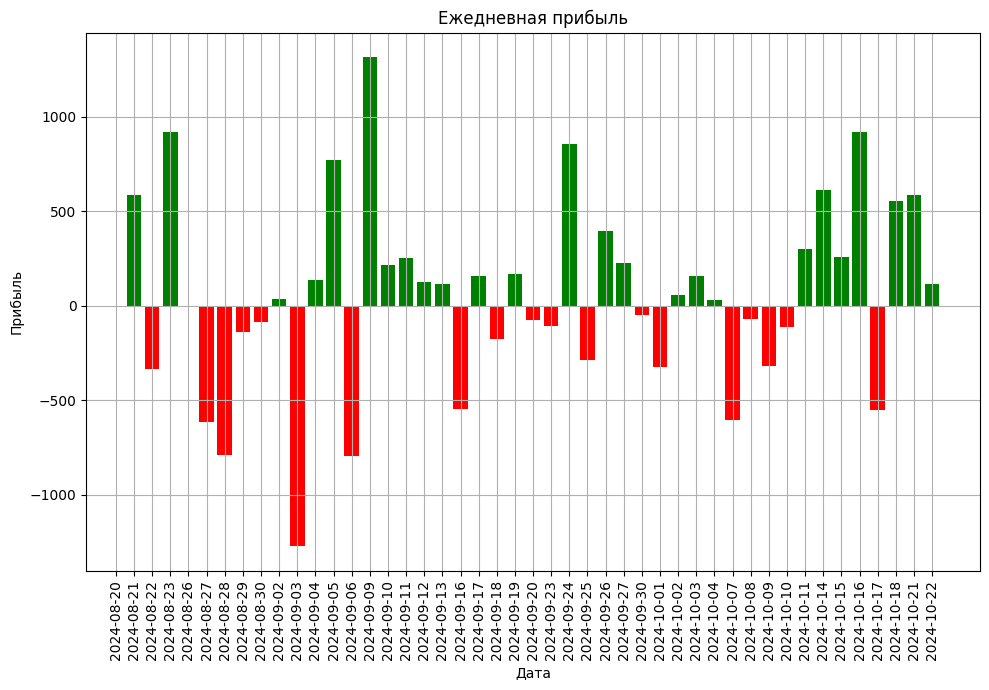

In [28]:
# Настройка цветов для столбиков: зеленый для положительной прибыли, красный для отрицательной
colors = ['green' if profit > 0 else 'red' for profit in daily_profit]

# Построение графика
plt.figure(figsize=(10, 7))
plt.bar(daily_profit.index, daily_profit, color=colors)
plt.title('Ежедневная прибыль')
plt.xlabel('Дата')
plt.ylabel('Прибыль')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

In [24]:
daily_profit.index

Index(['2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-26',
       '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-02',
       '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
       '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-16',
       '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-23',
       '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30',
       '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07',
       '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-14',
       '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21',
       '2024-10-22'],
      dtype='object')

In [47]:
import datetime
import calendar

# Функция для получения начала и конца текущей недели
def get_current_week():
    today = datetime.date.today()
    start_of_week = today - datetime.timedelta(days=today.weekday() + 3)  # Понедельник текущей недели
    end_of_week = start_of_week + datetime.timedelta(days=6)  # Воскресенье текущей недели
    return start_of_week.strftime('%Y-%m-%d'), end_of_week.strftime('%Y-%m-%d')

# Функция для получения начала и конца прошлой недели
def get_last_week():
    today = datetime.date.today()
    start_of_last_week = today - datetime.timedelta(days=today.weekday() + 10)  # Понедельник прошлой недели
    end_of_last_week = start_of_last_week + datetime.timedelta(days=10)  # Воскресенье прошлой недели
    return start_of_last_week.strftime('%Y-%m-%d'), end_of_last_week.strftime('%Y-%m-%d')

# Функция для получения начала и конца текущего месяца
def get_current_month():
    today = datetime.date.today()
    start_of_month = today.replace(day=1)  # Первый день текущего месяца
    last_day = calendar.monthrange(today.year, today.month)[1]  # Последний день текущего месяца
    end_of_month = today.replace(day=last_day)  # Последний день текущего месяца
    return start_of_month.strftime('%Y-%m-%d'), end_of_month.strftime('%Y-%m-%d')

# Функция для получения начала и конца прошлого месяца
def get_last_month():
    today = datetime.date.today()
    first_day_of_current_month = today.replace(day=1)
    last_day_of_last_month = first_day_of_current_month - datetime.timedelta(days=1)  # Последний день прошлого месяца
    start_of_last_month = last_day_of_last_month.replace(day=1)  # Первый день прошлого месяца
    return start_of_last_month.strftime('%Y-%m-%d'), last_day_of_last_month.strftime('%Y-%m-%d')

# Пример использования:
print("Текущая неделя:", get_current_week())
print("Прошлая неделя:", get_last_week())
print("Текущий месяц:", get_current_month())
print("Прошлый месяц:", get_last_month())


Текущая неделя: ('2024-11-29', '2024-12-05')
Прошлая неделя: ('2024-11-22', '2024-12-02')
Текущий месяц: ('2024-12-01', '2024-12-31')
Прошлый месяц: ('2024-11-01', '2024-11-30')


In [43]:
# Функция для получения начала и конца прошлой недели
def get_last_week(smechenie_dny1=0, smechenie_dny2=0):
    today = datetime.date.today()
    start_of_last_week = today - datetime.timedelta(days=today.weekday() + smechenie_dny1)  # Понедельник прошлой недели
    end_of_last_week = start_of_last_week + datetime.timedelta(days=6 + smechenie_dny2)  # Воскресенье прошлой недели
    return start_of_last_week.strftime('%Y-%m-%d'), end_of_last_week.strftime('%Y-%m-%d')

# Пример использования
start, end = get_last_week()
print(f"Начало периода: {start}, конец периода: {end}")


Начало периода: 2024-10-21, конец периода: 2024-10-27


In [52]:
def get_last_week():
    today = datetime.date.today()
    start_of_last_week = today - datetime.timedelta(days=today.weekday()+7 + 3)  # Понедельник прошлой недели
    end_of_last_week = start_of_last_week + datetime.timedelta(days=6 + 1)  # Воскресенье прошлой недели
    return start_of_last_week.strftime('%Y-%m-%d'), end_of_last_week.strftime('%Y-%m-%d')

get_last_week()

('2024-10-11', '2024-10-18')

Binance Петр

In [1]:
"""
Получает снимки аккаунта с Binance.

:param api_key: Ваш API ключ.
:param secret_key: Ваш секретный ключ.
:param snapshot_type: Тип аккаунта ('SPOT', 'MARGIN', 'FUTURES'). Здесь используется 'SPOT'.
:param start_time: Начальное время в миллисекундах (опционально).
:param end_time: Конечное время в миллисекундах (опционально).
:param limit: Количество записей (максимум 30).
:return: JSON-ответ от Binance.
# """
#     'Петр': {
#         "API Key": "Ie9hQZ0jIkhDAA9bpihtal1Rv39gavmRg5SMWjs3yCxEK7dPE189nBC6Oj7nFv9f", 
#         "Secret Key": "U8o95j49PvPV9zf9IPr88r8KMLVCBRB9trJL5zRNODsUKwiBFgXWLmG0GEaQJ7I1"
import time
secret_key = "U8o95j49PvPV9zf9IPr88r8KMLVCBRB9trJL5zRNODsUKwiBFgXWLmG0GEaQJ7I1"
import time
import requests
import hmac
import hashlib
import urllib.parse
import datetime

base_url = "https://api.binance.com"
endpoint = "/sapi/v1/accountSnapshot"
timestamp = int(time.time() * 1000)

params = {
    "type": 'SPOT',
    "timestamp": timestamp,
    "limit": 30
}

start_time = None
end_time = None
params["startTime"] = start_time

params["endTime"] = end_time

query_string = urllib.parse.urlencode(params)
signature = hmac.new(secret_key.encode('utf-8'), query_string.encode('utf-8'), hashlib.sha256).hexdigest()
query_string += "&signature=" + signature

url = base_url + endpoint + "?" + query_string
headers = {
    "X-MBX-APIKEY": 'Ie9hQZ0jIkhDAA9bpihtal1Rv39gavmRg5SMWjs3yCxEK7dPE189nBC6Oj7nFv9f'
}

response = requests.get(url, headers=headers)
data = response.json()
data

{'code': -1021,
 'msg': "Timestamp for this request was 1000ms ahead of the server's time."}

In [3]:
import time
import requests
import hmac
import hashlib
import urllib.parse

# Ваши API-ключи
api_key = "Ie9hQZ0jIkhDAA9bpihtal1Rv39gavmRg5SMWjs3yCxEK7dPE189nBC6Oj7nFv9f"
secret_key = "U8o95j49PvPV9zf9IPr88r8KMLVCBRB9trJL5zRNODsUKwiBFgXWLmG0GEaQJ7I1"

# URL API
base_url = "https://api.binance.com"
endpoint = "/sapi/v1/accountSnapshot"
time_endpoint = "/api/v1/time"

# Получаем серверное время с Binance
server_time_response = requests.get(base_url + time_endpoint)
server_time = server_time_response.json()["serverTime"]

# Параметры запроса
params = {
    "type": 'SPOT',  # Тип аккаунта
    "timestamp": server_time,  # Используем серверное время
    "limit": 30  # Максимум 30 записей
}

# Формируем строку запроса
query_string = urllib.parse.urlencode(params)

# Создаём подпись
signature = hmac.new(secret_key.encode('utf-8'), query_string.encode('utf-8'), hashlib.sha256).hexdigest()

# Добавляем подпись в параметры запроса
query_string += "&signature=" + signature

# Формируем окончательный URL
url = base_url + endpoint + "?" + query_string

# Заголовки с API ключом
headers = {
    "X-MBX-APIKEY": api_key
}

# Отправляем GET-запрос
response = requests.get(url, headers=headers)

# Получаем JSON-ответ
data = response.json()

# Выводим полученные данные
print(data)


{'code': 200, 'msg': '', 'snapshotVos': []}


In [11]:
import time
import requests
import hmac
import hashlib
import urllib.parse
# ПАвел 

# Binance:

# API Key: AYz9XX4NLC3EY4L7szwkIRYJRnOpyso1d7lt1LgBGG8EMA7UzgXtAyrDg5K430fc

# Secret Key: Cd99ZKucVLHJYbrhwtglhcKZYt1AlSPMyislVzULB7QSifMPoIbmTXOCOzxEYy7l

# Ваши API-ключи
# api_key = "Ie9hQZ0jIkhDAA9bpihtal1Rv39gavmRg5SMWjs3yCxEK7dPE189nBC6Oj7nFv9f"
# secret_key = "U8o95j49PvPV9zf9IPr88r8KMLVCBRB9trJL5zRNODsUKwiBFgXWLmG0GEaQJ7I1"

api_key = "AYz9XX4NLC3EY4L7szwkIRYJRnOpyso1d7lt1LgBGG8EMA7UzgXtAyrDg5K430fc"
secret_key = "Cd99ZKucVLHJYbrhwtglhcKZYt1AlSPMyislVzULB7QSifMPoIbmTXOCOzxEYy7l"

base_url = "https://api.binance.com"
endpoint = "/api/v3/account"

# Время в миллисекундах
timestamp = int(time.time() * 1000)

# Формируем параметры запроса
params = {
    "timestamp": timestamp
}

# Формируем строку запроса
query_string = urllib.parse.urlencode(params)

# Создаём подпись
signature = hmac.new(secret_key.encode('utf-8'), query_string.encode('utf-8'), hashlib.sha256).hexdigest()

# Добавляем подпись в параметры запроса
query_string += "&signature=" + signature

# Формируем окончательный URL
url = base_url + endpoint + "?" + query_string

# Заголовки с API ключом
headers = {
    "X-MBX-APIKEY": api_key
}

# Отправляем GET-запрос
response = requests.get(url, headers=headers)

# Получаем JSON-ответ
data = response.json()

# Печать данных
print(data)


{'makerCommission': 10, 'takerCommission': 10, 'buyerCommission': 0, 'sellerCommission': 0, 'commissionRates': {'maker': '0.00100000', 'taker': '0.00100000', 'buyer': '0.00000000', 'seller': '0.00000000'}, 'canTrade': True, 'canWithdraw': True, 'canDeposit': True, 'brokered': False, 'requireSelfTradePrevention': False, 'preventSor': False, 'updateTime': 1738321791786, 'accountType': 'SPOT', 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNB', 'free': '0.00023396', 'locked': '0.00000000'}, {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'GAS',

In [12]:
data

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00100000',
  'taker': '0.00100000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1738321791786,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00023396', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locke